# Proyek Analisis Data: Peminjaman Sepeda [bike-share]
- **Nama:** Dwi Andhara Valkyrie
- **Email:** dwiandharavalkyrie@gmail.com
- **ID Dicoding:** dwiandharavalkyrie

## Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda berubah selama musim berbeda?
- Apakah cuaca tertentu berhubungan dengan peningkatan peminjaman?
- Bagaimana tren peminjaman sepeda pada akhir pekan dibandingkan dengan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [2]:
#memanggil semua library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

Pada proses Gathering Data kita mengumpulkan semua data Bike Sharing yang dibutuhkan

Proses Gathering Data [dimulai]

**!!** Disini saya hanya menggunakan satu data yaitu bikeday_df karna menyesuaikan dengan pertanyaan bisnis saya

In [3]:
#Memuat tabel Bike Day [day.csv] menjadi sebuah DataFrame
bikeday_df = pd.read_csv("https://raw.githubusercontent.com/dwiandharavalkyrie/Proyek-Analisis-Data/main/day.csv")
bikeday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Pada proses Assessing Data kita akan menilai kualitas dari seluruh data Bike Sharing yang akan digunakan.

Memberikan informasi komprehensif tentang DataFrame, termasuk jumlah kolom, jumlah data yang tidak null, tipe data setiap kolom, dan penggunaan memori.

Proses Assesing Data pada DataFrame bikeday_df

In [4]:
bikeday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa tipe data data dari tiap kolom yang terdapat dalam bikeday_df menggunakan method .info()

Karena assesing data dan cleaning berhubungan, saya melakukan pengecekan data pada cleaning data proses

### Cleaning Data

Proses Cleaning Data dilakukan untuk membersihkan data dan memastikan bahwa ia tidak mempengaruhi hasil analisis yang akan dilakukan nantinya.

Proses Cleaning Data pada bikeday_df [dimulai]

Memeriksa apakah ada missing values yang terjadi pada bikeday_df

In [5]:
bikeday_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa tidak ada missing values yang terjadi pada bikeday_df

Memeriksa apakah ada duplikasi data yang terjadi pada bikeday_df

In [6]:
print("Jumlah Duplikasi: ", bikeday_df.duplicated().sum())

Jumlah Duplikasi:  0


Terlihat bahwa tidak ada duplikasi data yang terjadi pada bikeday_df

Memeriksa apakah ada keanehan dalam parameter statistik dari kolom numerik yang terdapat pada bikeday_df

In [8]:
bikeday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Terlihat tidak ada keanehan pada data diatas.

Proses cleaning data pada bikeday_df [selesai]

## Exploratory Data Analysis (EDA)

Melakukan Eklorasi Data

Melakukan ekplorasi data pada bikeday_df [dimulai]

[1]Melihat rangkuman parameter statistik pada bikeday_df

In [9]:
bikeday_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


[2] Melihat perhitungan peminjaman sepeda berdasarkan weathersit

In [10]:
bikeday_df.groupby(by="weathersit").agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                             registered                    \
              max min        mean         std        max  min         mean   
weathersit                                                                   
1            3410  15  964.030238  700.476488       6946  416  3912.755940   
2            3155   9  687.352227  619.082767       6844  491  3348.510121   
3            1264   2  185.476190  260.975022       4324   20  1617.809524   

                          cnt                                 
                    std   max  min         mean          std  
weathersit                                                    
1           1533.347265  8714  431  4876.786177  1879.483989  
2           1463.566884  8362  605  4035.862348  1809.109918  
3           1068.290954  4639   22  1803.285714  1240.284449

[3] Melihat perhitungan peminjaman sepeda berdasarkan temp

In [11]:
bikeday_df.groupby(by="temp").agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                   registered                     cnt        \
            max   min    mean std        max   min    mean std   max   min   
temp                                                                         
0.059130     93    93    93.0 NaN        888   888   888.0 NaN   981   981   
0.096522    150   150   150.0 NaN        836   836   836.0 NaN   986   986   
0.097391     86    86    86.0 NaN       1330  1330  1330.0 NaN  1416  1416   
0.107500     95    95    95.0 NaN       2273  2273  2273.0 NaN  2368  2368   
0.127500     73    73    73.0 NaN       1456  1456  1456.0 NaN  1529  1529   
...         ...   ...     ...  ..        ...   ...     ...  ..   ...   ...   
0.834167    829   829   829.0 NaN       4634  4634  4634.0 NaN  5463  5463   
0.838333    670   670   670.0 NaN       3176  3176  3176.0 NaN  3846  3846   
0.848333    562   562   562.0 NaN       2825  2825  2825.0 NaN  3387  3387   
0.849167    987   987   987.0 NaN       2298  2298  2298.0 NaN  3285  3285   
0.861667   1448  1448  1448.0 NaN       3392  3392  3392.0 NaN  4840  4840   

                      
            mean std  
temp                  
0.059130   981.0 NaN  
0.096522   986.0 NaN  
0.097391  1416.0 NaN  
0.107500  2368.0 NaN  
0.127500  1529.0 NaN  
...          ...  ..  
0.834167  5463.0 NaN  
0.838333  3846.0 NaN  
0.848333  3387.0 NaN  
0.849167  3285.0 NaN  
0.861667  4840.0 NaN  

[499 rows x 12 columns]

[4] Melihat perhitungan peminjaman sepeda berdasarkan atemp

In [12]:
bikeday_df.groupby(by="atemp").agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                   registered                     cnt        \
            max   min    mean std        max   min    mean std   max   min   
atemp                                                                        
0.079070     93    93    93.0 NaN        888   888   888.0 NaN   981   981   
0.098839    150   150   150.0 NaN        836   836   836.0 NaN   986   986   
0.101658     73    73    73.0 NaN       1456  1456  1456.0 NaN  1529  1529   
0.116175     54    54    54.0 NaN        768   768   768.0 NaN   822   822   
0.117930     86    86    86.0 NaN       1330  1330  1330.0 NaN  1416  1416   
...         ...   ...     ...  ..        ...   ...     ...  ..   ...   ...   
0.794829   1050  1050  1050.0 NaN       2556  2556  2556.0 NaN  3606  3606   
0.804287    987   987   987.0 NaN       2298  2298  2298.0 NaN  3285  3285   
0.804913   1448  1448  1448.0 NaN       3392  3392  3392.0 NaN  4840  4840   
0.826371    632   632   632.0 NaN       3152  3152  3152.0 NaN  3784  3784   
0.840896    562   562   562.0 NaN       2825  2825  2825.0 NaN  3387  3387   

                      
            mean std  
atemp                 
0.079070   981.0 NaN  
0.098839   986.0 NaN  
0.101658  1529.0 NaN  
0.116175   822.0 NaN  
0.117930  1416.0 NaN  
...          ...  ..  
0.794829  3606.0 NaN  
0.804287  3285.0 NaN  
0.804913  4840.0 NaN  
0.826371  3784.0 NaN  
0.840896  3387.0 NaN  

[690 rows x 12 columns]

[5]Melihat perhitungan peminjaman sepeda berdasarkan humidity

In [13]:
bikeday_df.groupby(by="hum").agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                   registered                     cnt        \
            max   min    mean std        max   min    mean std   max   min   
hum                                                                          
0.000000     46    46    46.0 NaN        577   577   577.0 NaN   623   623   
0.187917    532   532   532.0 NaN       1103  1103  1103.0 NaN  1635  1635   
0.254167   3252  3252  3252.0 NaN       3605  3605  3605.0 NaN  6857  6857   
0.275833   2230  2230  2230.0 NaN       2939  2939  2939.0 NaN  5169  5169   
0.290000    531   531   531.0 NaN       4571  4571  4571.0 NaN  5102  5102   
...         ...   ...     ...  ..        ...   ...     ...  ..   ...   ...   
0.948261    114   114   114.0 NaN        491   491   491.0 NaN   605   605   
0.949583    126   126   126.0 NaN       2468  2468  2468.0 NaN  2594  2594   
0.962500     69    69    69.0 NaN       1538  1538  1538.0 NaN  1607  1607   
0.970417     50    50    50.0 NaN        655   655   655.0 NaN   705   705   
0.972500    258   258   258.0 NaN       2137  2137  2137.0 NaN  2395  2395   

                      
            mean std  
hum                   
0.000000   623.0 NaN  
0.187917  1635.0 NaN  
0.254167  6857.0 NaN  
0.275833  5169.0 NaN  
0.290000  5102.0 NaN  
...          ...  ..  
0.948261   605.0 NaN  
0.949583  2594.0 NaN  
0.962500  1607.0 NaN  
0.970417   705.0 NaN  
0.972500  2395.0 NaN  

[595 rows x 12 columns]

[6] Melihat perhitungan peminjaman sepeda dengan windspeed

In [14]:
bikeday_df.groupby(by="windspeed").agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                   registered                     cnt        \
             max   min    mean std        max   min    mean std   max   min   
windspeed                                                                     
0.022392     949   949   949.0 NaN       4036  4036  4036.0 NaN  4985  4985   
0.042304    1514  1514  1514.0 NaN       3603  3603  3603.0 NaN  5117  5117   
0.045404    2235  2235  2235.0 NaN       3174  3174  3174.0 NaN  5409  5409   
0.045408     120   120   120.0 NaN       1592  1592  1592.0 NaN  1712  1712   
0.046650     337   337   337.0 NaN       4750  4750  4750.0 NaN  5087  5087   
...          ...   ...     ...  ..        ...   ...     ...  ..   ...   ...   
0.417908     208   208   208.0 NaN       1705  1705  1705.0 NaN  1913  1913   
0.421642     317   317   317.0 NaN       2415  2415  2415.0 NaN  2732  2732   
0.422275     471   471   471.0 NaN       3724  3724  3724.0 NaN  4195  4195   
0.441563     486   486   486.0 NaN       4896  4896  4896.0 NaN  5382  5382   
0.507463     532   532   532.0 NaN       1103  1103  1103.0 NaN  1635  1635   

                       
             mean std  
windspeed              
0.022392   4985.0 NaN  
0.042304   5117.0 NaN  
0.045404   5409.0 NaN  
0.045408   1712.0 NaN  
0.046650   5087.0 NaN  
...           ...  ..  
0.417908   1913.0 NaN  
0.421642   2732.0 NaN  
0.422275   4195.0 NaN  
0.441563   5382.0 NaN  
0.507463   1635.0 NaN  

[650 rows x 12 columns]

Penggabungan informasi

In [15]:
bikeday_df.groupby(by=["weathersit", "temp", "atemp", "hum", "windspeed"]).agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                    \
                                                   max   min    mean std   
weathersit temp     atemp    hum      windspeed                            
1          0.059130 0.079070 0.400000 0.171970      93    93    93.0 NaN   
           0.096522 0.098839 0.436522 0.246600     150   150   150.0 NaN   
           0.097391 0.117930 0.491739 0.158330      86    86    86.0 NaN   
           0.127500 0.101658 0.464583 0.409212      73    73    73.0 NaN   
           0.138333 0.116175 0.434167 0.361950      54    54    54.0 NaN   
...                                                ...   ...     ...  ..   
3          0.543333 0.517717 0.906250 0.248150     217   217   217.0 NaN   
           0.590833 0.542333 0.871667 0.104475     315   315   315.0 NaN   
           0.595833 0.549912 0.865417 0.213300    1264  1264  1264.0 NaN   
           0.599167 0.544229 0.917083 0.097021     118   118   118.0 NaN   
           0.633913 0.555361 0.939565 0.192748     153   153   153.0 NaN   

                                                registered                    \
                                                       max   min    mean std   
weathersit temp     atemp    hum      windspeed                                
1          0.059130 0.079070 0.400000 0.171970         888   888   888.0 NaN   
           0.096522 0.098839 0.436522 0.246600         836   836   836.0 NaN   
           0.097391 0.117930 0.491739 0.158330        1330  1330  1330.0 NaN   
           0.127500 0.101658 0.464583 0.409212        1456  1456  1456.0 NaN   
           0.138333 0.116175 0.434167 0.361950         768   768   768.0 NaN   
...                                                    ...   ...     ...  ..   
3          0.543333 0.517717 0.906250 0.248150        2199  2199  2199.0 NaN   
           0.590833 0.542333 0.871667 0.104475        4324  4324  4324.0 NaN   
           0.595833 0.549912 0.865417 0.213300        3195  3195  3195.0 NaN   
           0.599167 0.544229 0.917083 0.097021        1878  1878  1878.0 NaN   
           0.633913 0.555361 0.939565 0.192748        1689  1689  1689.0 NaN   

                                                  cnt                    
                                                  max   min    mean std  
weathersit temp     atemp    hum      windspeed                          
1          0.059130 0.079070 0.400000 0.171970    981   981   981.0 NaN  
           0.096522 0.098839 0.436522 0.246600    986   986   986.0 NaN  
           0.097391 0.117930 0.491739 0.158330   1416  1416  1416.0 NaN  
           0.127500 0.101658 0.464583 0.409212   1529  1529  1529.0 NaN  
           0.138333 0.116175 0.434167 0.361950    822   822   822.0 NaN  
...                                               ...   ...     ...  ..  
3          0.543333 0.517717 0.906250 0.248150   2416  2416  2416.0 NaN  
           0.590833 0.542333 0.871667 0.104475   4639  4639  4639.0 NaN  
           0.595833 0.549912 0.865417 0.213300   4459  4459  4459.0 NaN  
           0.599167 0.544229 0.917083 0.097021   1996  1996  1996.0 NaN  
           0.633913 0.555361 0.939565 0.192748   1842  1842  1842.0 NaN  

[731 rows x 12 columns]

Melihat perhitungan berdasarkan month, year, season

In [16]:
bikeday_df.groupby(by=["season", "yr", "mnth"]).agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]

}

)

casual                               registered        \
                  max  min         mean         std        max   min   
season yr mnth                                                         
1      0  1       331    9    99.129032   72.503215       1844   416   
          2       694   47   222.928571  193.234827       2348   905   
          3      1424   46   447.850000  376.438752       2355   491   
          12      665  103   286.636364  176.060372       2841   451   
       1  1      1070   67   289.322581  235.103295       4185  1234   
          2      1435   65   300.724138  262.347084       4546  1456   
          3      3155  203   909.850000  722.106879       5315  2713   
          12      644    9   300.909091  176.499549       3402   432   
2      0  3       981  166   351.727273  237.805841       2243  1221   
          4      1965  121   744.866667  497.720787       3722   674   
          5      2355  255  1001.612903  525.722530       4238  2213   
          6      1869  513  1014.950000  475.870778       4414  2993   
       1  3      2469  531  1220.090909  645.423033       5893  2339   
          4      3252  120  1281.866667  843.933922       5950   907   
          5      3410  342  1426.935484  888.284562       6433  2501   
          6      2963  477  1492.300000  820.816160       6456  3594   
3      0  6      1920  661  1031.300000  446.787807       4488  3385   
          7      3065  562  1175.870968  665.455420       4220  2298   
          8      1914  226   930.387097  359.765449       4614   889   
          9      2521  118   901.954545  631.148347       4332  1689   
       1  6      2657  778  1344.800000  690.140533       6365  4232   
          7      2562  747  1345.322581  519.993166       6790  3195   
          8      2827  935  1393.451613  449.915462       6541  3341   
          9      3160  371  1467.772727  771.761370       6917  3197   
4      0  9      1776  258   837.750000  538.671580       4372  2137   
          10     2397   57   813.612903  617.780796       4267   570   
          11     1275   69   519.800000  374.552091       3891   935   
          12      706   50   264.750000  168.552936       3672   655   
       1  9      2589  751  1435.875000  782.193516       6946  4874   
          10     3031    2  1114.129032  759.714540       6911    20   
          11     2290  123   700.300000  542.275166       5520  1470   
          12     1153  212   496.750000  252.931627       6055  2787   

                                           cnt                                  
                       mean          std   max   min         mean          std  
season yr mnth                                                                  
1      0  1     1132.774194   370.027540  1985   431  1231.903226   372.432665  
          2     1499.035714   331.779990  2927  1005  1721.964286   398.508839  
          3     1612.450000   447.145270  3239   605  2060.300000   638.912654  
          12    1748.818182   804.662143  3068   754  2035.454545   825.154939  
       1  1     2831.451613   792.457689  4521  1301  3120.774194   872.852134  
          2     3255.724138   839.594200  5062  1529  3556.448276   870.724640  
          3     4133.100000   869.923947  7836  3194  5042.950000  1198.144639  
          12    1572.545455   889.589609  3623   441  1873.454545   967.303299  
2      0  3     1724.545455   311.391832  2703  1536  2076.272727   367.329033  
          4     2417.466667   809.575143  5312   795  3162.333333  1042.093593  
          5     3379.709677   566.067911  5805  2633  4381.322581   572.927883  
          6     3674.350000   459.935153  5342  3767  4689.300000   471.706209  
       1  3     4599.545455  1017.536669  8362  3372  5819.636364  1241.197428  
          4     4525.600000  1056.822551  7460  1027  5807.466667  1308.938916  
          5     4891.290323   963.828761  8294  2843  6318.225806  1078.403997  
          6     5366.100000   827.80

Melihat perhitungan peminjaman sepeda berdasarkan weekday, workingday, holiday

In [17]:
bikeday_df.groupby(by=["weekday","workingday", "holiday"]).agg({
    "casual" : ["max", "min", "mean", "std"],
    "registered" : ["max", "min", "mean", "std"],
    "cnt" : ["max", "min", "mean", "std"]


}

)

casual                                registered  \
                              max   min         mean         std        max   
weekday workingday holiday                                                    
0       0          0         3283    54  1338.295238  809.324777       5657   
1       0          1         3065   117  1117.333333  897.783673       5172   
        1          0         1233     2   600.266667  345.682676       6435   
2       0          1          440   440   440.000000         NaN        573   
        1          0         1348     9   557.310680  344.230715       6697   
3       0          1         2562  2562  2562.000000         NaN       4841   
        1          0         1383     9   531.621359  350.721892       6946   
4       0          1          955   560   757.500000  279.307179       1470   
        1          0         1405    15   587.696078  373.563169       6781   
5       0          1          642   440   541.000000  142.835570       2928   
        1          0         2469    38   756.431373  487.053934       6917   
6       0          0         3410    57  1465.257143  927.082884       5966   

                                                             cnt        \
                             min         mean          std   max   min   
weekday workingday holiday                                               
0       0          0         451  2890.533333  1179.713036  8227   605   
1       0          1         883  2856.333333  1473.329546  6370  1000   
        1          0          20  3798.600000  1474.548080  7525    22   
2       0          1         573   573.000000          NaN  1013  1013   
        1          0         674  3987.310680  1520.256583  7767   683   
3       0          1        4841  4841.000000          NaN  7403  7403   
        1          0         432  3989.203883  1730.104379  8173   441   
4       0          1         935  1202.500000   378.302128  2425  1495   
        1          0         416  4132.647059  1607.455869  7804   431   
5       0          1        2484  2706.000000   313.955411  3368  3126   
        1          0        1129  3962.156863  1499.219056  8362  1167   
6       0          0         570  3085.285714  1358.068784  8714   627   

                                                      
                                   mean          std  
weekday workingday holiday                            
0       0          0        4228.828571  1872.496629  
1       0          1        3973.666667  2061.976779  
        1          0        4398.866667  1749.872921  
2       0          1        1013.000000          NaN  
        1          0        4544.621359  1802.560842  
3       0          1        7403.000000          NaN  
        1          0        4520.825243  2028.275446  
4       0          1        1960.000000   657.609307  
        1          0        4720.343137  1919.276841  
5       0          1        3247.000000   171.119841  
        1          0        4718.588235  1881.876462  
6       0          0        4550.542857  2196.693009

Ekloprasi data bikeday_df [selesai]

## Visualization & Explanatory Analysis

Visualization merupakan tahapan yang harus dilakukan sebelum membuat kesimpulan dan mengomunikasikan (draw conclusion & communicate) hasil dari proses analisis yang telah dilakukan.

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berubah selama musim berbeda?

Melihat dataframe peminjaman sepeda berdasarkan musim (season)

[1] Memuat data dan memastikan kolom-kolom sesuai dengan struktur data aktual

In [18]:
bikeday_df = bikeday_df.reset_index()[['season', 'dteday', 'cnt']]
print(bikeday_df.head())

   season      dteday   cnt
0       1  2011-01-01   985
1       1  2011-01-02   801
2       1  2011-01-03  1349
3       1  2011-01-04  1562
4       1  2011-01-05  1600


[2] Membuat mapping dan mengganti antara nilai numerik pada season menjadi label musim agar pembaca visualization data dapat mengerti

In [19]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
bikeday_df['season'] = bikeday_df['season'].map(season_mapping)

[3] Mengelompokkan data berdasarkan musim (season) dan menghitung total peminjaman sepeda

In [20]:
trend_by_season = bikeday_df.groupby('season')['cnt'].sum().reset_index()

[5] Membuat plot garis untuk menampilkan tren

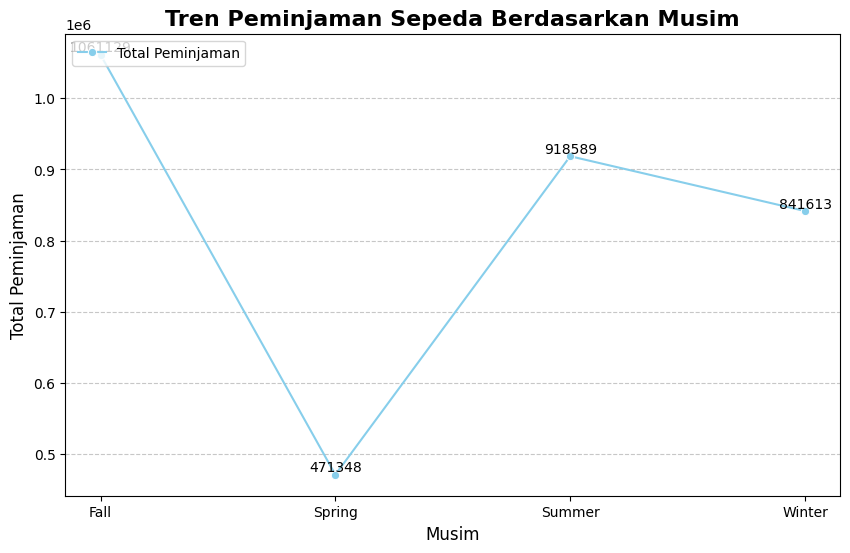

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='cnt', data=trend_by_season, marker='o', color='skyblue', label='Total Peminjaman')
# Menambahkan elemen desain dan integritas
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Menambahkan label data pada setiap titik
for index, row in trend_by_season.iterrows():
    plt.text(row['season'], row['cnt'], str(row['cnt']), ha='center', va='bottom', fontsize=10)
plt.legend(loc='upper left')
plt.show()

Versi bar chart:

<ipython-input-22-d4503b036315>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=trend_by_season, palette='viridis')


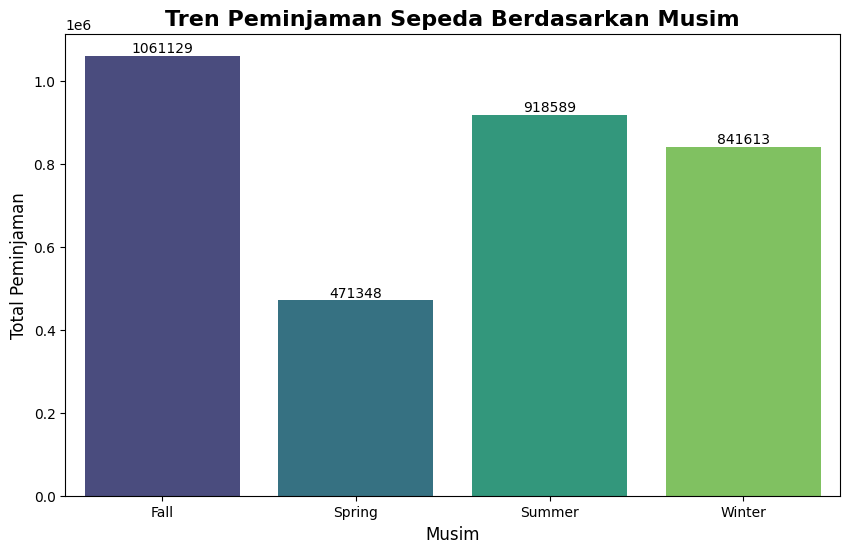

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=trend_by_season, palette='viridis')
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim', fontsize=16, fontweight='bold')
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
for index, row in trend_by_season.iterrows():
    plt.text(index, row['cnt'], str(row['cnt']), ha='center', va='bottom', fontsize=10)

plt.show()

### Pertanyaan 2: Apakah cuaca tertentu berhubungan dengan peningkatan peminjaman?

[1] Memanggil atribut apa saja yang kita butuhkan untuk menjawab pertanyaan

In [43]:
bikeday_df = bikeday_df.reset_index()[['dteday','weathersit', 'cnt']]
print(bikeday_df.head())

      dteday  weathersit   cnt
0 2011-01-01           2   985
1 2011-01-02           2   801
2 2011-01-03           1  1349
3 2011-01-04           1  1562
4 2011-01-05           1  1600


[2] Membuatkan mapping untuk memberikan keterangan yang jelas terhadap unique number pada weathersit sehingga pembaca data visualisasi lebih mudah mengerti

In [50]:
weathersit_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}
bikeday_df['weathersit'] = bikeday_df['weathersit'].map(weathersit_mapping)

In [56]:
print(bikeday_df['weathersit'].unique())

['Cloudy' 'Clear' 'Light Rain']


[3] Mengelompokkan data berdasarkan cuaca (weathersit) dan menghitung total peminjaman sepeda

In [51]:
trend_by_weathersit = bikeday_df.groupby('weathersit')['cnt'].sum().reset_index()

[4] Membuatkan data visualisasi peminjaman sepeda berdasarkan cuaca (weathersit)

<ipython-input-60-3df627768a73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


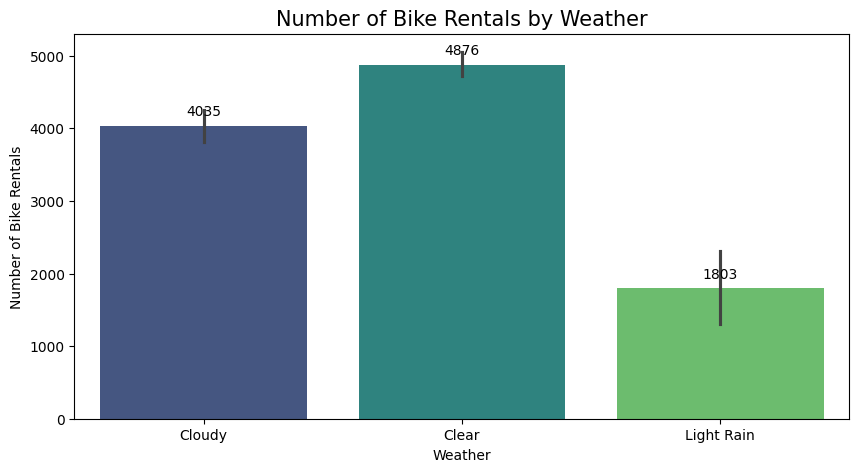

In [60]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="weathersit",
    y="cnt",
    data=bikeday_df,
    palette="viridis"  # Ganti palette sesuai preferensi warna Anda
)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
plt.title("Number of Bike Rentals by Weather", loc="center", fontsize=15)
plt.xlabel("Weather")
plt.ylabel("Number of Bike Rentals")

plt.show()

### Pertanyaan 3: Bagaimana tren peminjaman sepeda pada akhir pekan dibandingkan dengan hari kerja?

[1] Melakukan pemilihan atribut

In [62]:
bikeday_df = pd.read_csv("https://raw.githubusercontent.com/dwiandharavalkyrie/Proyek-Analisis-Data/main/day.csv")

In [63]:
selected_attributes = ['weekday', 'workingday', 'cnt']
selected_data = bikeday_df[selected_attributes]

[2]Pengelompokan berdasarkan weekday dan workingday

In [64]:
grouped_data = selected_data.groupby(['weekday', 'workingday']).mean().reset_index()

[3] Memisahkan antara akhir pekan dan hari kerja

In [67]:
weekend_data = grouped_data[grouped_data['workingday'] == 0]
weekday_data = grouped_data[grouped_data['workingday'] == 1]

[4] Menambahkan kolom baru untuk menandakan hari kerja atau libur

In [77]:
bikeday_df['day_type'] = 'Weekday'
bikeday_df.loc[bikeday_df['holiday'] == 1, 'day_type'] = 'Holiday'

[5]Melakukan visualization data

<ipython-input-79-4c8583f67011>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', hue='day_type', data=bikeday_df, palette={'Weekday': 'lightblue', 'Holiday': 'orange'},


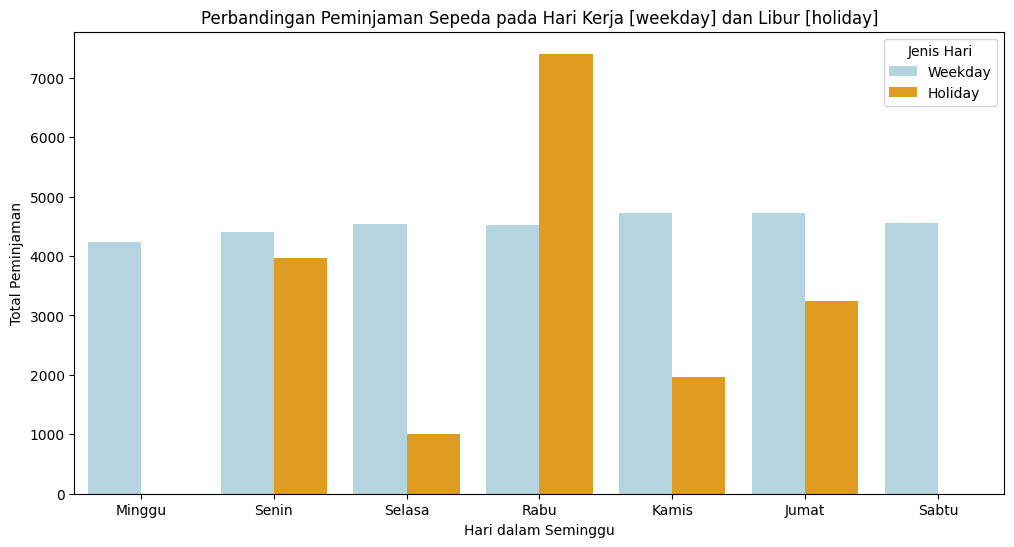

In [79]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
sns.barplot(x='weekday', y='cnt', hue='day_type', data=bikeday_df, palette={'Weekday': 'lightblue', 'Holiday': 'orange'},
            ci=None, dodge=True)

plt.title('Perbandingan Peminjaman Sepeda pada Hari Kerja [weekday] dan Libur [holiday]')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Peminjaman')
plt.xticks(ticks=range(0, 7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.legend(title='Jenis Hari')
plt.show()

## Conclusion

**Pertanyaan 1:** Bagaimana tren peminjaman sepeda berubah selama musim berbeda?


1. Pada visualization data dapat dilihat bahwa tren peminjaman sepeda tertinggi berdasarkan musim adalah musim gugur (fall) dan disusul oleh musim panas (summer),  yang mungkin disebabkan oleh cuaca yang lebih menyenangkan.
2.   Musim dimana tren peminjaman sepeda terendah ialah musim gugur (spring) yang mungkin disebabkan oleh cuaca yang belum sepenuhnya membaik setelah musim dingin.



**Pertanyaan 2:** Apakah cuaca tertentu berhubungan dengan peningkatan peminjaman?


1.  Pada visualisasi data menunjukkan bahwa peminjaman sepeda tertinggi terdapat pada cuaca cerah (clear weather) yang dimana ini mungkin terjadi disebabkan karena pada cuaca cerah dimana mood orang-orang meningkat untuk mengendarai sepeda
2.   Berbeda dengan cuaca hujan lebat (heavy rain) dimana tidak ada terjadinya peminjaman sepeda. Tentu saja tidak ada orang yang berminat untuk mengendarai sepeda dicuaca hujan yang lebat



**Pertanyaan 3:** Bagaimana tren peminjaman sepeda pada akhir pekan dibandingkan dengan hari kerja?



1.   Peminjaman sepeda cenderung stabil dan konsisten selama hari kerja dan juga total peminjaman sepeda pada hari kerja lebih terdistribusi merata sepanjang minggu.
2.   Peminjaman sepeda cenderung meningkat pada hari libur, terutama pada akhir pekan (Sabtu dan Minggu).
3. Peminjaman sepeda cenderung mencapai puncaknya pada akhir pekan, khususnya pada hari Sabtu.
Hari Minggu juga menunjukkan peningkatan peminjaman, meskipun mungkin sedikit lebih rendah dibandingkan dengan hari Sabtu.

